In [4]:
import json
import pandas as pd
import os
import numpy as np
import glob
from konlpy.tag import Mecab

In [5]:
#json파일의 개수 확인

def number_json_files(directories, original_datas):
        index_image = []
        number_of_texts = 0
        
    
        for directory in directories:
            for jsonfile in os.listdir(directory):
                with open(os.path.join(directory, jsonfile), "r", encoding="utf-8") as f:
                    f = json.load(f)
                    image_list = f["image_label"]
                    text = f["text_label"]

                    for image in image_list:
                        index_image.append(image["index"])
            number_of_texts += len(os.listdir(directory))

                    
        number_of_images = len(index_image) 
        
        number_of_datas = {
            'images':number_of_images,
            'texts':number_of_texts
        }
        
        print(f'Number of datas: {number_of_datas}')
        
        remains = {
            'remain_images': original_datas['images'] - number_of_datas['images'],
            'remain_texts':  original_datas['texts'] - number_of_datas['texts']
        }
        
        return f'Need more datas: {remains}'

In [30]:
path = "/home/ubuntu/Desktop/Project/datasets/circlin_feeds_dataset"
original_ds = os.path.join(path, "circlin_feeds_dataset/raw_data/feed_data_20210630_2249(fixed_abnormal_extension)(전체_0~282268)(FACES, REALIMG).xlsx")
deidentification_path = os.path.join(path, "deidentification/deidentification_completed_20211123.xlsx")
json_dirs = [os.path.join(path, '10_211122(whole)')]
json_list = os.listdir(json_dirs[0])

In [7]:
print(len(json_list))
print(len(list(set(json_list))))

242430
242430


In [8]:
#Find error images

invalidImage_index = []
labeled_index = []
for directory in json_dirs:
    for jsonfile in os.listdir(directory):
        with open(os.path.join(path, directory, jsonfile), "r", encoding="utf-8") as f:
            f = json.load(f)
            image_list = f["image_label"]
            
            for image in image_list:
                try:
                    if image["invalidImage"]==True or image["invalidImage"]=="보이지 않음":
                        #print(f"{directory} 디렉터리, 에러 이미지:{f['sourceData']['seq'], image['index'], image['invalidImage']}")
                        invalidImage_index.append(image['index'])
                except:
                    #print(f"{directory} 디렉터리, {f['sourceData']['seq'], image['index']}")
                    labeled_index.append(image["index"])

In [9]:
print(len(invalidImage_index), len(labeled_index))
print(len(invalidImage_index) + len(labeled_index))

6945 265386
272331


In [10]:
deidentification_df = pd.read_excel(deidentification_path)

In [11]:
deidentification_df.tail(20)

,INDEX,FEED_DATE,SEQ,USER_PK,URL,IMGTYPE,FACES,TEXTDATA
282249,282249,2021-07-03 21:24:12,402519,63735.0,https://cyld20183.speedgabia.com/Image/SNS/637...,image,n,우중주 기가막히네!??\n내일은 비오면 뛰어야지??
282250,282250,2021-07-03 21:24:12,402519,63735.0,https://cyld20183.speedgabia.com/Image/SNS/637...,image,n,우중주 기가막히네!??\n내일은 비오면 뛰어야지??
282251,282251,2021-07-03 21:35:11,402523,63964.0,https://cyld20183.speedgabia.com/Image/SNS/639...,image,n,점심은 오랜만에 친구만나서 빵먹기ㅎㅎ\n저녁은 사진은 없지만 닭찌야채볶음이랑 핏콩바!
282252,282252,2021-07-03 21:44:58,402526,51823.0,https://cyld20183.speedgabia.com/Image/SNS/518...,image,n,장마시작전 얼른 달림
282253,282253,2021-07-03 21:44:59,402527,52053.0,https://cyld20183.speedgabia.com/Image/SNS/520...,image,n,폼롤러근막스트레칭\n기초 둔부 복부 각성\n팔굽혀펴기 15회 × 5세트\n4세트중반...
282254,282254,2021-07-03 21:44:59,402527,52053.0,https://cyld20183.speedgabia.com/Image/SNS/520...,image,n,폼롤러근막스트레칭\n기초 둔부 복부 각성\n팔굽혀펴기 15회 × 5세트\n4세트중반...
282255,282255,2021-07-03 21:45:30,402528,52053.0,https://cyld20183.speedgabia.com/Image/SNS/520...,image,n,폼롤러근막스트레칭\n기초 둔부 복부 각성\n팔굽혀펴기 15회 × 5세트\n4세트중반...
282256,282256,2021-07-03 21:45:30,402528,52053.0,https://cyld20183.speedgabia.com/Image/SNS/520...,image,n,폼롤러근막스트레칭\n기초 둔부 복부 각성\n팔굽혀펴기 15회 × 5세트\n4세트중반...
282257,282257,2021-07-03 21:46:24,402529,52053.0,https://cyld20183.speedgabia.com/Image/SNS/520...,image,n,5키로러닝\n폼롤러근막스트레칭\n기초 둔부 복부 각성
282258,282258,2021-07-03 21:46:24,402529,52053.0,https://cyld20183.speedgabia.com/Image/SNS/520...,image,n,5키로러닝\n폼롤러근막스트레칭\n기초 둔부 복부 각성


In [12]:
print(len(deidentification_df))
print(len(deidentification_df[deidentification_df['FACES']=='n'])) #209652
print(len(deidentification_df[deidentification_df['FACES']=='y'])) #56139
print(len(deidentification_df[deidentification_df['FACES']=='x'])) #527

282269
223717
58003
549


In [13]:
all_label = invalidImage_index + labeled_index
all_label = sorted(all_label)
print(all_label[:30])
len(all_label)

[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


272331

In [14]:
def processed_rows_from_deidentification(label_list, deidentified_df):        
    #deidentified_df['index'] = deidentified_df['index'].astype(int) #original_df의 자료형과 불일치하므로, merge 전 일치화
    
    return len(deidentified_df), deidentified_df.loc[label_list]

In [15]:
processed = processed_rows_from_deidentification(all_label, deidentification_df)
num_deidentified = processed[0]
processed_data = processed[1]

In [16]:
print(f"Deidentified data: {num_deidentified}")
print(f"Processed data: {len(processed_data)}")

print(f"Omitted: {num_deidentified - len(processed_data)}")
print(len(processed_data[processed_data['FACES']=='n'])) #223703
print(len(processed_data[processed_data['FACES']=='y'])) #48224
print(len(processed_data[processed_data['FACES']=='x'])) #405

Deidentified data: 282269
Processed data: 272331
Omitted: 9938
223703
48224
404


In [17]:
len(deidentification_df['SEQ'].unique())

242439

In [18]:
len(processed_data['SEQ'].unique())

242430

In [19]:
json_seq = [int(x.split('-')[1].split('.')[0]) for x in json_list]
print(len(json_seq))
print(len(set(json_seq)))

242430
242430


In [20]:
from collections import Counter

Counter(json_seq).most_common()

[(363375, 1),
 (18943, 1),
 (8592, 1),
 (45542, 1),
 (100434, 1),
 (395833, 1),
 (377286, 1),
 (385706, 1),
 (41251, 1),
 (284841, 1),
 (163009, 1),
 (284517, 1),
 (312645, 1),
 (273006, 1),
 (170831, 1),
 (319555, 1),
 (259980, 1),
 (374571, 1),
 (280655, 1),
 (282373, 1),
 (152853, 1),
 (133888, 1),
 (349228, 1),
 (378242, 1),
 (143737, 1),
 (379049, 1),
 (362275, 1),
 (245475, 1),
 (14460, 1),
 (313542, 1),
 (179050, 1),
 (198317, 1),
 (262548, 1),
 (183814, 1),
 (56698, 1),
 (72648, 1),
 (368894, 1),
 (237254, 1),
 (188763, 1),
 (8472, 1),
 (34220, 1),
 (130391, 1),
 (280150, 1),
 (370854, 1),
 (260381, 1),
 (296427, 1),
 (236619, 1),
 (137280, 1),
 (353869, 1),
 (373419, 1),
 (5050, 1),
 (347616, 1),
 (242064, 1),
 (247926, 1),
 (31033, 1),
 (5621, 1),
 (285058, 1),
 (256449, 1),
 (20035, 1),
 (398143, 1),
 (385692, 1),
 (56524, 1),
 (22462, 1),
 (314240, 1),
 (310608, 1),
 (58193, 1),
 (6341, 1),
 (367217, 1),
 (24128, 1),
 (271086, 1),
 (64382, 1),
 (49870, 1),
 (313222, 1),
 (3

In [31]:
len(set(processed_data['SEQ'].unique().tolist()))

242430

In [32]:
set(sorted(json_seq))-set(processed_data['SEQ'].unique().tolist())

set()

In [33]:
processed_data.head(20)

,INDEX,FEED_DATE,SEQ,USER_PK,URL,IMGTYPE,FACES,TEXTDATA
0,0,2020-09-11,12,5607.0,http://103.60.126.35/Image/SNS/5607/5607_21_1.jpg,image,n,2020.9.11\n아침 : 요거트볼\n-\n아침부터 잠옷바람에 민낯으로 영상찍는 ...
1,1,2020-09-11,12,5607.0,http://103.60.126.35/Image/SNS/5607/5607_21_2.jpg,image,n,2020.9.11\n아침 : 요거트볼\n-\n아침부터 잠옷바람에 민낯으로 영상찍는 ...
2,2,2020-09-10,13,5607.0,http://103.60.126.35/Image/SNS/5607/5607_22_3.jpg,image,n,2020.9.10\n러닝하고 찍엇더니 머리는 산발에 눈썹이 다 지워졌네요 뎨동해오?...
4,4,2020-09-10,14,5607.0,http://103.60.126.35/Image/SNS/5607/5607_23.jpg,image,n,2020.9.10\n?‍♀️ 4.01km\n-\n요새 등산 못갔더니 체력이 쓰레기가...
5,5,2020-09-10,15,5607.0,http://103.60.126.35/Image/SNS/5607/5607_24.jpg,image,n,2020.9.10\n아침 : 베노프 단호박 + 무화과\n-\n오늘은 조출이라 빨리 ...
6,6,2020-09-09,16,5607.0,http://103.60.126.35/Image/SNS/5607/5607_25_2.jpg,image,n,2020.9.9\n?클로이팅 힙 & 하체 / 클로이팅 복근 / 싸이클 20분\n-\...
7,7,2020-09-09,16,5607.0,http://103.60.126.35/Image/SNS/5607/5607_25_1.jpg,image,n,2020.9.9\n?클로이팅 힙 & 하체 / 클로이팅 복근 / 싸이클 20분\n-\...
8,8,2020-09-09,17,5607.0,http://103.60.126.35/Image/SNS/5607/5607_26.jpg,image,n,2020.9.9\n아침 : 무화과오픈토스트\n-\n으으 추워 이제 아침에 따뜻한게 ...
9,9,2020-09-08,18,5607.0,http://103.60.126.35/Image/SNS/5607/5607_27.jpg,image,n,2020.9.8\n? 8:29~9:46 어깨 / 클로이팅 복근 2주챌린지 / 싸이클...
10,10,2020-09-08,19,5607.0,http://103.60.126.35/Image/SNS/5607/5607_28.jpg,image,n,2020.9.8\n아침 :오나오\n


In [34]:
len(processed_data['TEXTDATA'].unique())

194892

In [35]:
processed_data.tail(20)

,INDEX,FEED_DATE,SEQ,USER_PK,URL,IMGTYPE,FACES,TEXTDATA
282249,282249,2021-07-03 21:24:12,402519,63735.0,https://cyld20183.speedgabia.com/Image/SNS/637...,image,n,우중주 기가막히네!??\n내일은 비오면 뛰어야지??
282250,282250,2021-07-03 21:24:12,402519,63735.0,https://cyld20183.speedgabia.com/Image/SNS/637...,image,n,우중주 기가막히네!??\n내일은 비오면 뛰어야지??
282251,282251,2021-07-03 21:35:11,402523,63964.0,https://cyld20183.speedgabia.com/Image/SNS/639...,image,n,점심은 오랜만에 친구만나서 빵먹기ㅎㅎ\n저녁은 사진은 없지만 닭찌야채볶음이랑 핏콩바!
282252,282252,2021-07-03 21:44:58,402526,51823.0,https://cyld20183.speedgabia.com/Image/SNS/518...,image,n,장마시작전 얼른 달림
282253,282253,2021-07-03 21:44:59,402527,52053.0,https://cyld20183.speedgabia.com/Image/SNS/520...,image,n,폼롤러근막스트레칭\n기초 둔부 복부 각성\n팔굽혀펴기 15회 × 5세트\n4세트중반...
282254,282254,2021-07-03 21:44:59,402527,52053.0,https://cyld20183.speedgabia.com/Image/SNS/520...,image,n,폼롤러근막스트레칭\n기초 둔부 복부 각성\n팔굽혀펴기 15회 × 5세트\n4세트중반...
282255,282255,2021-07-03 21:45:30,402528,52053.0,https://cyld20183.speedgabia.com/Image/SNS/520...,image,n,폼롤러근막스트레칭\n기초 둔부 복부 각성\n팔굽혀펴기 15회 × 5세트\n4세트중반...
282256,282256,2021-07-03 21:45:30,402528,52053.0,https://cyld20183.speedgabia.com/Image/SNS/520...,image,n,폼롤러근막스트레칭\n기초 둔부 복부 각성\n팔굽혀펴기 15회 × 5세트\n4세트중반...
282257,282257,2021-07-03 21:46:24,402529,52053.0,https://cyld20183.speedgabia.com/Image/SNS/520...,image,n,5키로러닝\n폼롤러근막스트레칭\n기초 둔부 복부 각성
282258,282258,2021-07-03 21:46:24,402529,52053.0,https://cyld20183.speedgabia.com/Image/SNS/520...,image,n,5키로러닝\n폼롤러근막스트레칭\n기초 둔부 복부 각성


In [142]:
len(os.listdir(json_dirs[0]))

242430

In [144]:
#라벨별 빈도 체크
def find_labels(directories): #list
    dict_image_label = {}
    dict_text_label = {}
    num_valid_images = 0
    num_texts = 0
    invalidImage = []
    for directory in directories:
        json_list = os.listdir(directory)
        
        for jsonfile in json_list:
            with open(os.path.join(directory, jsonfile), "r", encoding="utf-8") as f:
                f = json.load(f)
                image_list = f["image_label"]
                text = f["text_label"]
                
                #Image label #Consider invalidImage
                for image in image_list:
                    if "invalidImage" not in image.keys():
                        num_valid_images += 1
                        
                        if image["athletics"][0] != "none":
                            for athletics_label in image["athletics"]:
                                if athletics_label in dict_image_label.keys():
                                    dict_image_label[athletics_label] += 1
                                else:
                                    print(f"Key {athletics_label} first added: {f['sourceData']['seq']}")
                                    dict_image_label[athletics_label] = 0
                        else:
                            pass
                        if image["foods"][0] != "none":
                            for foods_label in image["foods"]:
                                if foods_label in dict_image_label.keys():
                                    dict_image_label[foods_label] += 1
                                else:
                                    print(f"Key {foods_label} first added: {f['sourceData']['seq']}")                                
                                    dict_image_label[foods_label] = 0
                        else:
                            pass
                        if image["etc"][0] != "none":
                            for etc_label in image["etc"]:
                                if etc_label in dict_image_label.keys():
                                    dict_image_label[etc_label] += 1
                                else:
                                    print(f"Key {etc_label} first added: {f['sourceData']['seq']}")                                    
                                    dict_image_label[etc_label] = 0
                        else:
                            pass   
                    else:
                        invalidImage.append(image['index'])
                
                #Text label
                num_texts += 1
                if text["athletics"][0] != "none":
                    for athletics_label in text["athletics"]:
                        if athletics_label in dict_text_label.keys():
                            dict_text_label[athletics_label] += 1
                        else:
                            dict_text_label[athletics_label] = 0
                else:
                    pass
                if text["foods"][0] != "none":
                    for foods_label in text["foods"]:
                        if foods_label in dict_text_label.keys():
                            dict_text_label[foods_label] += 1
                        else:
                            dict_text_label[foods_label] = 0
                else:
                    pass
                if text["etc"][0] != "none":
                    for etc_label in text["etc"]:
                        if etc_label in dict_text_label.keys():
                            dict_text_label[etc_label] += 1
                        else:
                            dict_text_label[etc_label] = 0
                else:
                    pass
    return [dict_image_label, dict_text_label], num_valid_images, num_texts, invalidImage

In [145]:
labels_dict = find_labels(json_dirs)

Key 일상생활 first added: 363375
Key 웨이트 first added: 18943
Key 운동기구 first added: 18943
Key 루틴기록 first added: 18943
Key 기타운동 first added: 8592
Key 신체기록 first added: 8592
Key 일반식 first added: 100434
Key 건강식 first added: 100434
Key 달리기/조깅 first added: 395833
Key 운동용품 first added: 395833
Key 유산소기록 first added: 395833
Key 건강간식 first added: 385706
Key 필라테스 first added: 284517
Key 자전거 first added: 282373
Key 홈트 first added: 152853
Key 종합운동 first added: 245475
Key 온라인클래스 first added: 313542
Key 맨몸 first added: 179050
Key 일반음료 first added: 368894
Key 보충제 first added: 237254
Key 건강음료 first added: 130391
Key 걷기/산책 first added: 370854
Key 보조제 first added: 236619
Key 수상스포츠 first added: 242064
Key 등산/등반 first added: 285058
Key 의류 first added: 20035
Key 기타식단 first added: 62093
Key 일반간식 first added: 99038
Key 축구/풋살 first added: 140993
Key 간편식 first added: 161317
Key 폴댄스 first added: 15394
Key 스키/스노보드 first added: 3661
Key 요가 first added: 101237
Key 테니스 first added: 176735
Key 격투기 first added: 133059
Key 

In [150]:
print(len(labels_dict[0][0]))
print(len(labels_dict[0][1]))
print(labels_dict[1])
print(labels_dict[2])
print(len(labels_dict[3]))

46
46
265386
242430
6945


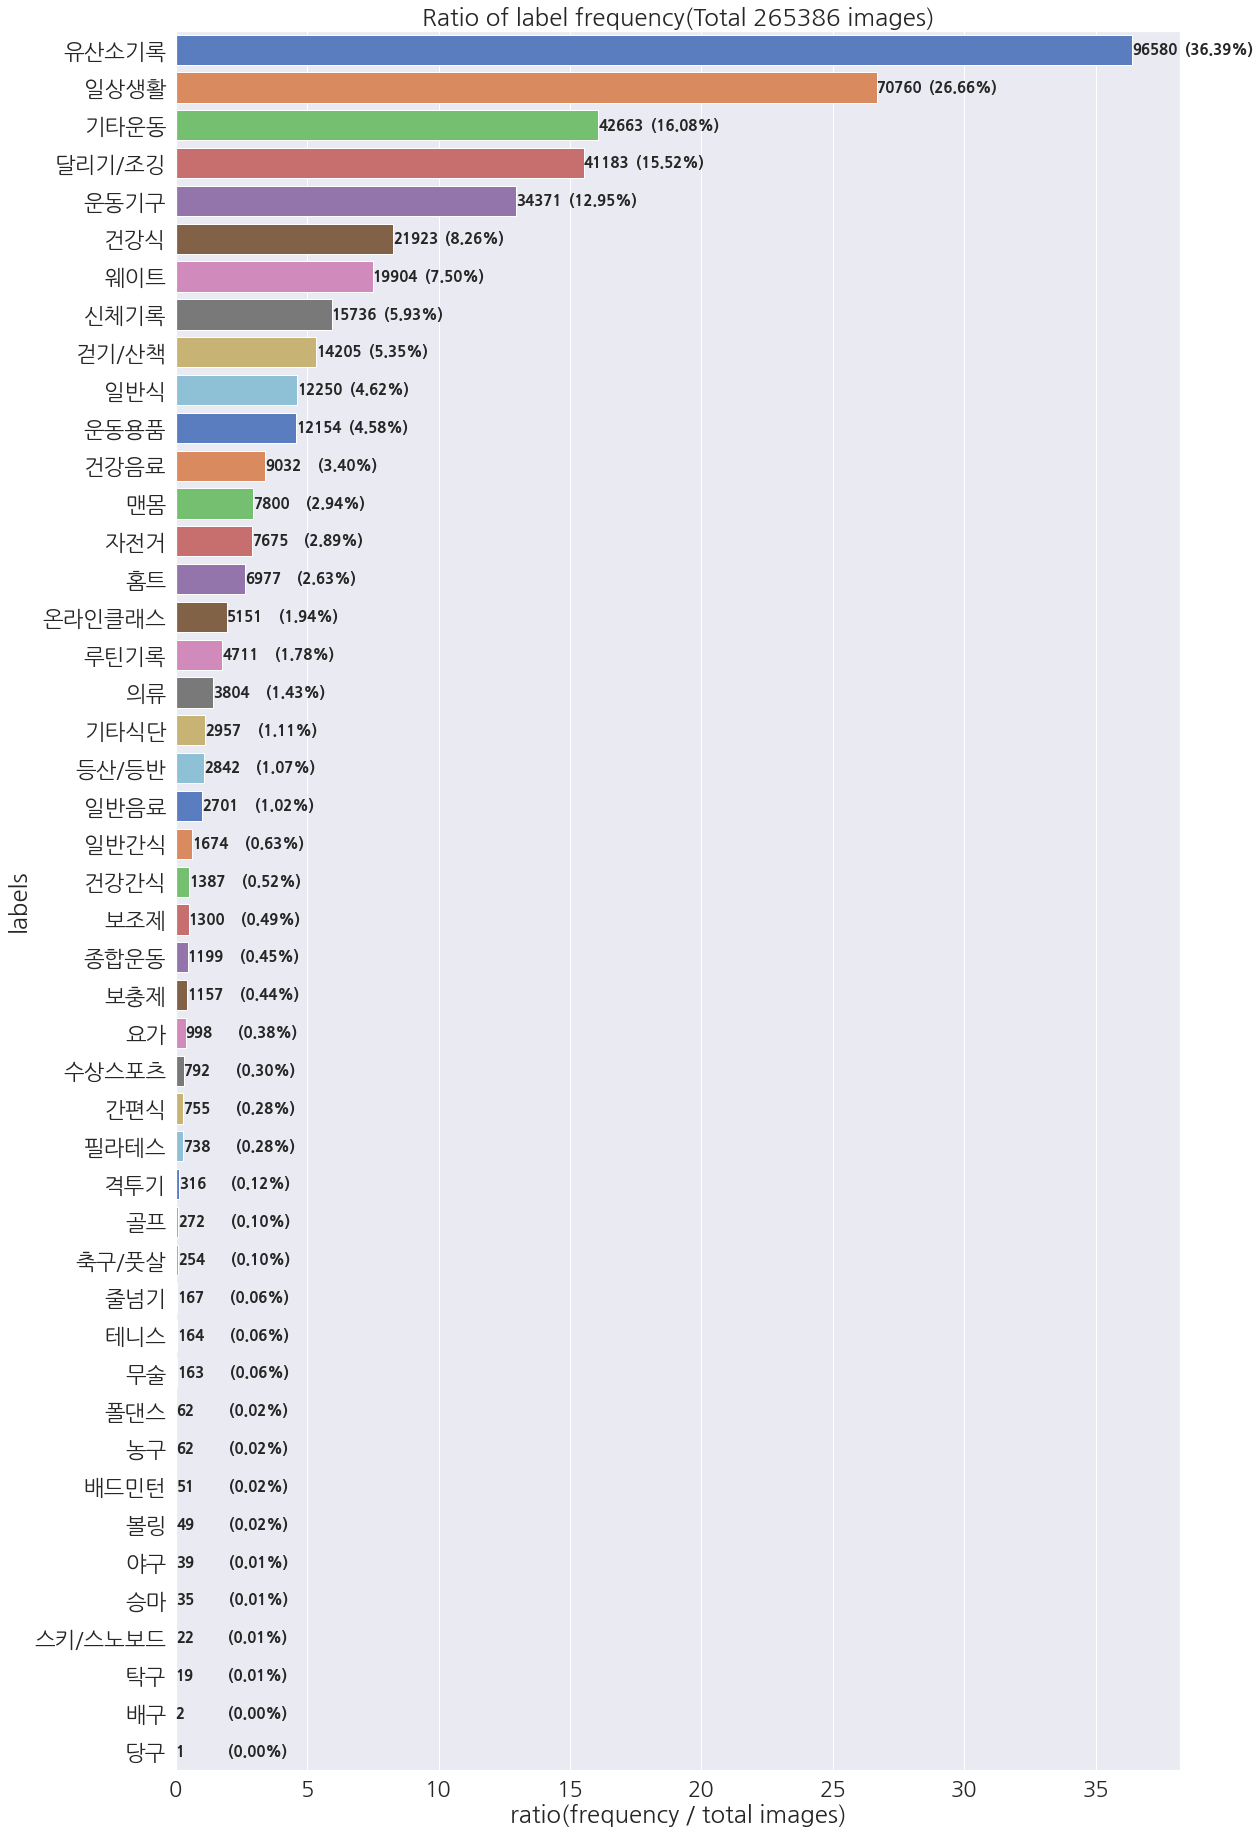

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2)
plt.rcParams['font.family'] = 'NanumGothic'

total_images = labels_dict[1]

sorted_image_labels = sorted(labels_dict[0][0].items(), key=(lambda x: x[1]), reverse=True)
ratio_image_labels = [( x[1] / total_images ) * 100 for x in sorted_image_labels]

bar, ax = plt.subplots(figsize=(18, 32))
sns_image_df = pd.DataFrame({'labels': [x[0] for x in sorted_image_labels],
                                   'ratio(frequency / total images)': ratio_image_labels})
ax = sns.barplot(x="ratio(frequency / total images)", 
                 y="labels", 
                 data=sns_image_df,
                 ci=None,
                 palette="muted", 
                 orient="h")
ax.set_title(f"Ratio of label frequency(Total {total_images} images)")

for index, rect in enumerate(ax.patches):
    ax.text(rect.get_width(), rect.get_y() + 0.5, sorted_image_labels[index][1], weight="bold", fontsize=15)    
    ax.text(rect.get_width() + 2, rect.get_y() + 0.5, "({:.2f}%)".format(ratio_image_labels[index]), weight="bold", fontsize=15)

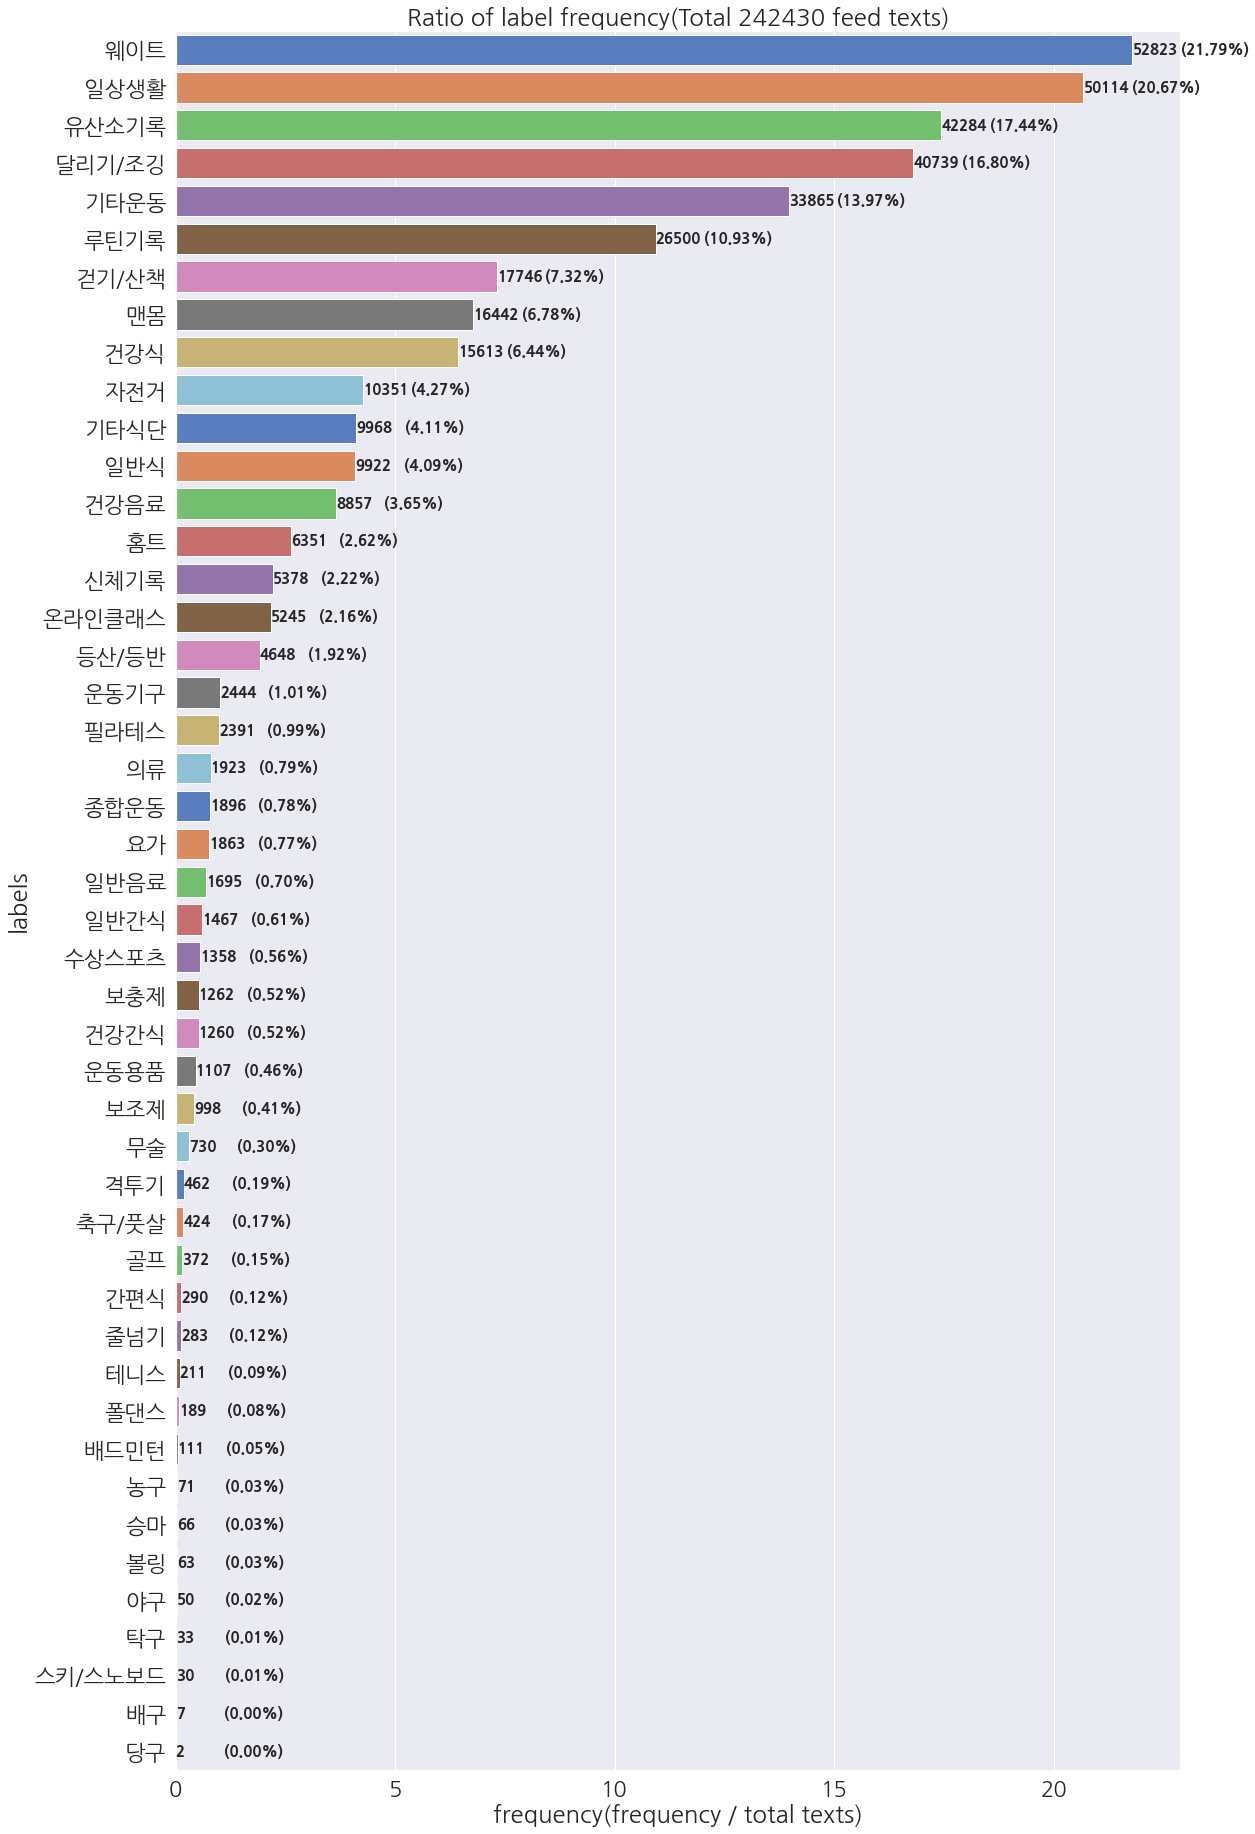

In [163]:
sns.set(font_scale=2)
plt.rcParams['font.family'] = 'NanumGothic'

total_texts = labels_dict[2]
sorted_text_labels = sorted(labels_dict[0][1].items(), key=(lambda x: x[1]), reverse=True)
ratio_text_labels = [( x[1] / total_texts ) * 100 for x in sorted_text_labels]

bar, ax = plt.subplots(figsize=(18, 32))
sns_text_df = pd.DataFrame({'labels': [x[0] for x in sorted_text_labels],
                                   'frequency(frequency / total texts)': ratio_text_labels})
ax = sns.barplot(x="frequency(frequency / total texts)", 
                 y="labels", 
                 data=sns_text_df,
                 ci=None,
                 palette="muted", 
                 orient="h")
ax.set_title(f"Ratio of label frequency(Total {total_texts} feed texts)")

for index, rect in enumerate(ax.patches):
    ax.text(rect.get_width(), rect.get_y() + 0.5, sorted_text_labels[index][1], weight="bold", fontsize=15)    
    ax.text(rect.get_width() + 1.1, rect.get_y() + 0.5, "({:.2f}%)".format(ratio_text_labels[index]), weight="bold", fontsize=15)

In [43]:
#invalid image
print(f"invalid images: {len(sorted(labels_dict[1]))}")

invalid images: 6946


In [58]:
sorted(labels_dict[1])[:100]

[74,
 85,
 89,
 90,
 107,
 124,
 130,
 140,
 144,
 190,
 235,
 290,
 303,
 334,
 345,
 370,
 395,
 430,
 445,
 625,
 638,
 684,
 712,
 747,
 763,
 778,
 789,
 790,
 813,
 828,
 855,
 876,
 881,
 970,
 1008,
 40934,
 53082,
 53111,
 53124,
 53215,
 53318,
 55017,
 55019,
 56987,
 58235,
 60070,
 64695,
 64734,
 64735,
 64740,
 64748,
 64812,
 64852,
 64866,
 64907,
 64909,
 64913,
 64915,
 64918,
 64920,
 64921,
 64926,
 64929,
 64930,
 64941,
 64945,
 64953,
 64956,
 64959,
 64963,
 64966,
 64968,
 64969,
 64971,
 64973,
 64974,
 64976,
 64979,
 64980,
 64982,
 64990,
 64993,
 64995,
 64997,
 65002,
 65004,
 65089,
 65167,
 65363,
 65366,
 65373,
 65376,
 65380,
 65383,
 65389,
 65426,
 65454,
 65475,
 65477,
 65488]